#### This notebook is aimed at robustly scaling data after temoving the outliers.
The notebook implements an algorithm that I developed for removing outliers from a 1-D dataset  and for robust scaling all the data points after that.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler

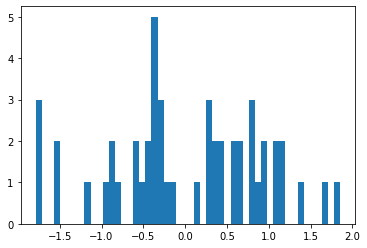

In [2]:
# Take a random small sample from normal distribution
# The method of removing outliers has been tested on uniform distribution too. 
N = 50
mu = 0
sigma = 1
x = np.random.normal(mu, sigma, N)
x_1 = x
plt.hist(x, bins= N)
plt.show()

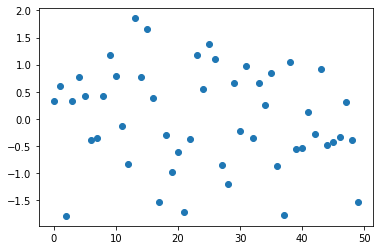

In [3]:
plt.scatter(range(len(x)), x)

In [4]:
x.std()

0.9044853600049667

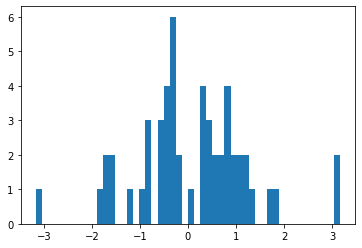

In [5]:
# Add 3 outliers to the sample that are about 3.5 sigma away from the mean. Remember: the number outliers must not be too high
# otherwise, they would be considered a part of the normal distribution whose sigma is higher than what we started with.
# While working with distributions other than Gaussian, the method of adding outliers would differ. Take care of that. 

x=np.append(x, np.array([mu+3.5*x.std(), mu+3.5*x.std(),mu -3.5*x.std()]))
x_orig = x

plt.hist(x, bins= N)
plt.show()

0.8767162400524966
<built-in method mean of numpy.ndarray object at 0x000001FD71951C50>
0


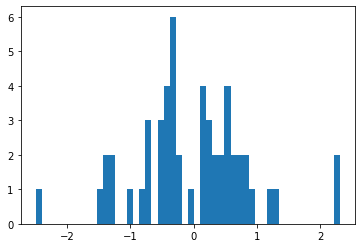

In [6]:
# Generate the scaled data from sklearn Robust Scaler for comparison later
scaler = RobustScaler()
x_r_scaled =  scaler.fit_transform(x_orig.reshape(-1, 1))
plt.hist(x_r_scaled, bins = N)
print(x_r_scaled.std())
print(x_r_scaled.mean)
print(len(x_orig) - len(x_r_scaled))
plt.show()

In [7]:
def outlier_removal(x):
    '''
    Remove the points in the data whose removal decrease the std of the data by a factor of atleast 1+tol in the standard deviation in the data. 

    '''     
    # Initialise old_sigma and new_sigma to enter the while loop.
    old_sigma = 2
    new_sigma = 1
    # TODO: Find a more mathematically validated universal way of finding this tolerance factor.
    tol = 0.2

    while(old_sigma/new_sigma > 1 + tol):
        print(old_sigma)
        print(new_sigma)
        # Calculate the current std of the data
        old_sigma = x.std()
        # remove outliers from the data using this outlier factor.
        # The outlier factor would be between 2 and 2.5 for small datasets since their mu and sigma are too sensitive 
        # to outliers. These factors were experimentally tested by me, but further research can be done to find the optimum 
        # outlier factor for any size of the data. 
        if (len(x)>40):
            outlier_factor = 2.5
        else:
            outlier_factor = 2
        # Keep only the data points that do not fall too far from their mean.
        inlier_indices = abs(x - x.mean()) < outlier_factor*x.std()
        x = x[inlier_indices]    
        # calculate new std
        new_sigma = x.std()
    return x
    

2
1
1.154828448972167
0.9044853600049667
0.9044853600049667


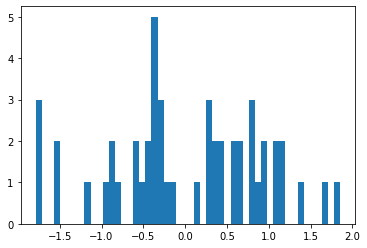

In [8]:
# Obtain data points after removing the outliers
x = outlier_removal(x_orig)
print(x.std())
plt.hist(x, bins = N)
plt.show()

###### These many outliers are removed.

In [9]:
len(x_orig) - len(x)

3

In [10]:
def my_robust_scaling(b : np.array, mu: float, sigma: float):
    '''
    Scales the data based on  a given mu and sigma.
    '''
    b = (b-mu)/sigma
    return b

In [11]:
# checking the std of the entire dataset including the added outliers. 
print(x_orig.std())

# checking the std of the data points sampled from N(0,1). Its std should be close to 1.
print(x_1.std())

1.154828448972167
0.9044853600049667


In [12]:
# Checkign the std of the sample without the outliers removed using the outlier_removal() function.
x.std()

0.9044853600049667

In [13]:
# Scale the entire data (including the outliers) using the mean and sigma calculated on the data after removing outliers.
x_orig_robust_scaled = my_robust_scaling(x_orig, x.mean(), x.std())

 

In [14]:
# StandardScaler from sklearn.
# The std deviation calculated by the Standard Scaler is the same as that with std() function which is 
# calculated using sqrt(mean(b)), where x = abs(a - a.mean())**2
stdScaler = StandardScaler(with_std = True)
x_stdscaled = stdScaler.fit_transform(x_orig.reshape(-1,1))


In [15]:
x_stdscaled.std()

1.0

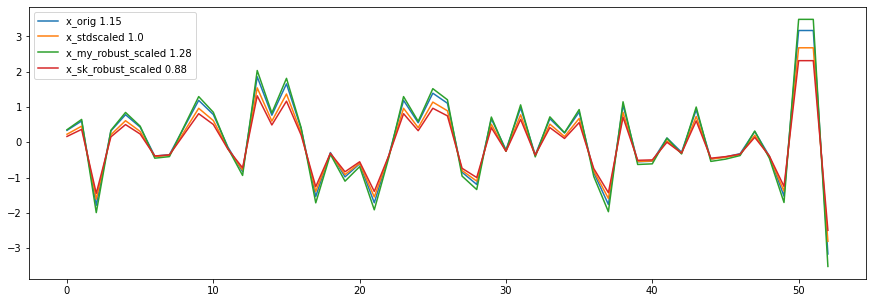

std of x (sampled from N(0,1)) before adding the outliers was 0.9044853600049667


In [16]:
# Plotting the series of data points after scaling in various ways. 
plt.figure(figsize = (15,5))
plt.plot(range(len(x_orig)), x_orig, label = f'x_orig {x_orig.std().round(2)}')
plt.plot(range(len(x_orig)), x_stdscaled, label = f'x_stdscaled {x_stdscaled.std().round(2)}')
plt.plot(range(len(x_orig)), x_orig_robust_scaled, label = f'x_my_robust_scaled {x_orig_robust_scaled.std().round(2)}')
plt.plot(range(len(x_orig)), x_r_scaled, label = f'x_sk_robust_scaled {x_r_scaled.std().round(2)}')
plt.legend()
plt.show()
print(f'std of x (sampled from N(0,1)) before adding the outliers was {x_1.std()}')


#### From the above graph, it can be seen that 
 - sklearn robust scaler includes the outliers in the sgima calculation of the entier data and drastically scaled them down to the same range as the normal data points.
 - StandardScaler also let the outliers influence the normal data points in their scaling.
 - My Robust Standard Scaler kept  did not let the outliers influence the scaling of other data points, and since it used a smaller sigma than that of the entire dataset, it did not reduce the amplitude of the outliers either. 
 
 Thus, for small datasets, that are highly sensitive to the presence of outliers, I would use my robust standard scaler!
 
 Your comments and criticsm are welcome. 